In [1]:
!pip install missingno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
cars = pd.read_csv("used_cars_data.csv")

In [3]:
cars.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
cars.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [5]:
cars.drop("S.No.", axis = 1, inplace = True)

In [6]:
cars.shape

(7253, 13)

In [7]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [8]:
cars.describe(include="object").T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Mileage,7251,450,17.0 kmpl,207
Engine,7207,150,1197 CC,732
Power,7207,386,74 bhp,280
New_Price,1006,625,63.71 Lakh,6


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [10]:
count = cars.isnull().sum()
percentage = round(cars.isna().sum()/cars.isna().count() * 100)

missingValues = pd.DataFrame({'Count': count.values,'percentage %':percentage.values}, index = cars.columns) 
missingValues = missingValues.sort_values('Count', ascending=False)


missingValues


,Count,percentage %
New_Price,6247,86.0
Price,1234,17.0
Seats,53,1.0
Engine,46,1.0
Power,46,1.0
Mileage,2,0.0
Name,0,0.0
Location,0,0.0
Year,0,0.0
Kilometers_Driven,0,0.0


<AxesSubplot:>

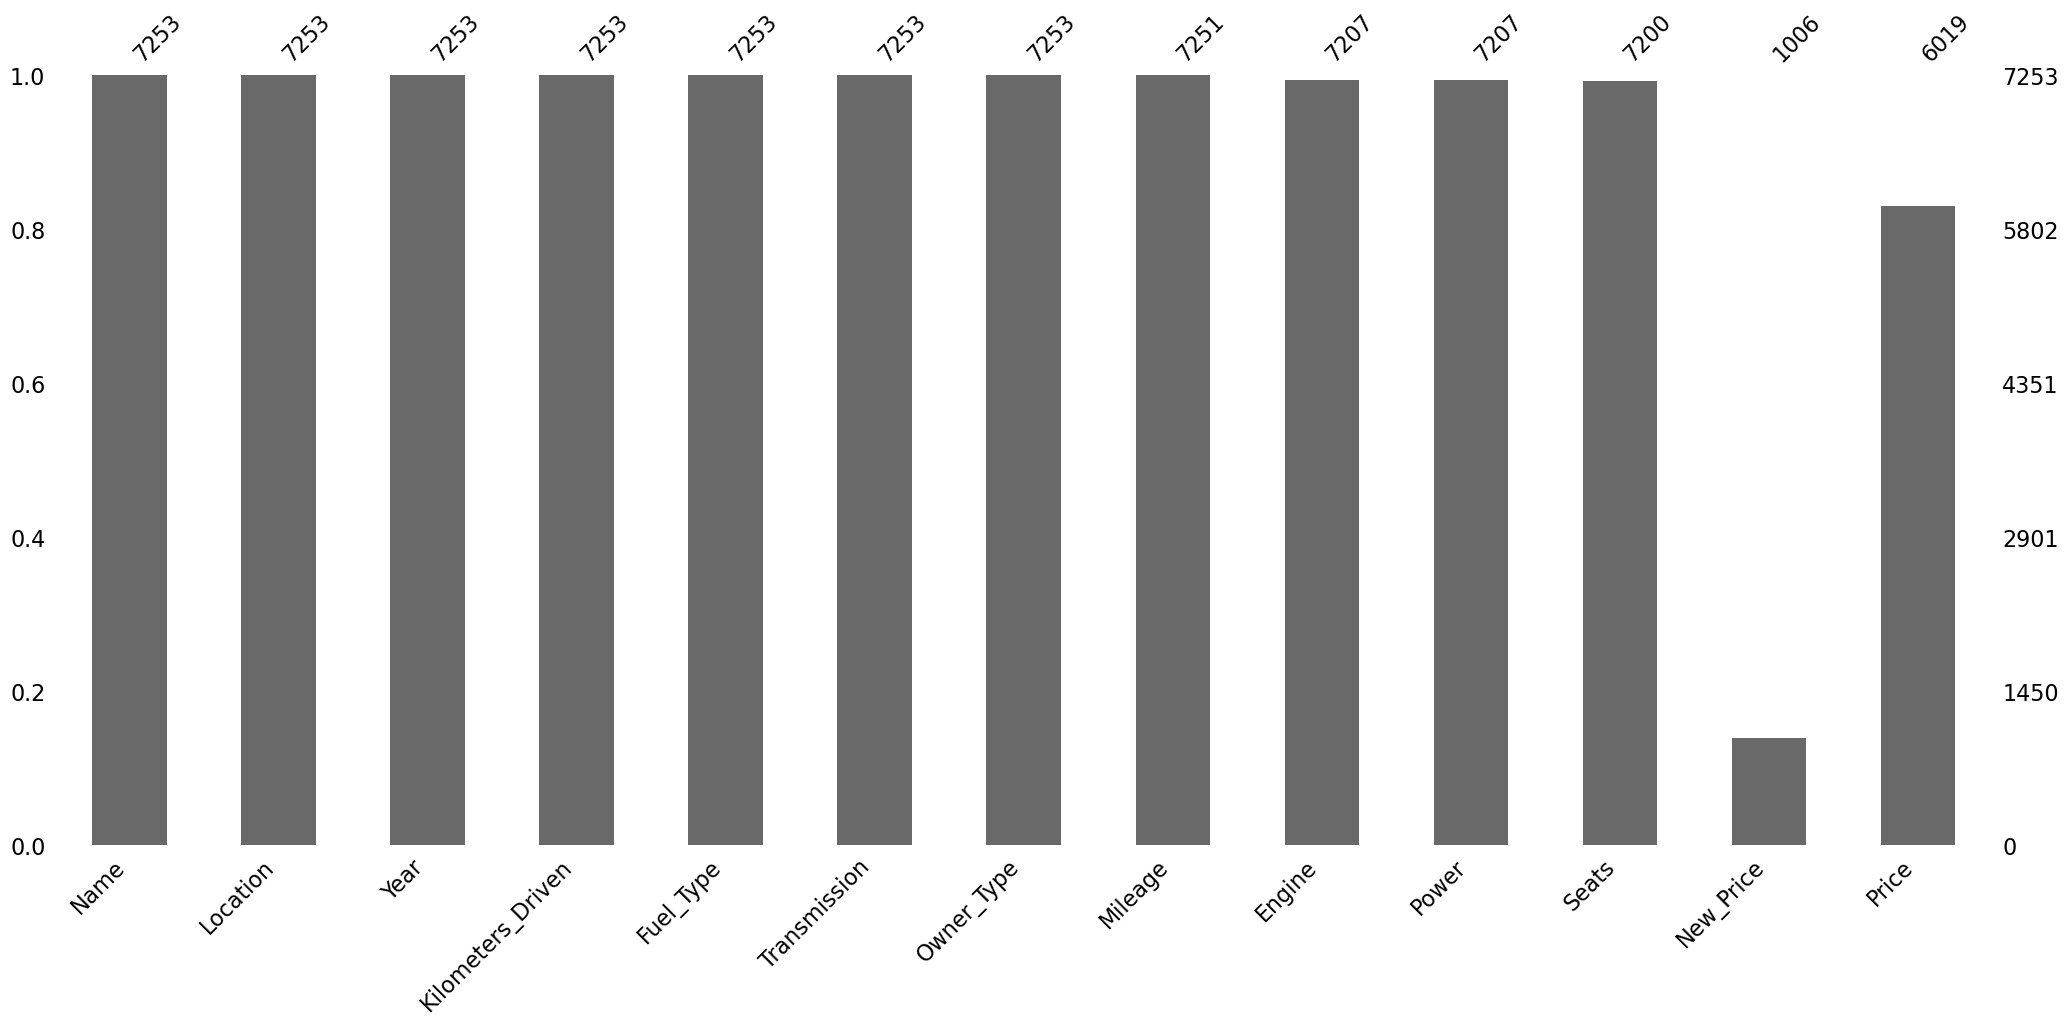

In [11]:
msno.bar(cars) 

In [12]:
#deleting new Price columns because it has too many missing values
cars.drop("New_Price", axis = 1, inplace = True)

In [13]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [14]:
#Spliting the text and number from the mileage, engine and power columns

numericList = ["Mileage","Engine","Power"]

for i in range(0,len(numericList)):
    cars[numericList[i]] = cars[numericList[i]].apply(lambda x: str(x).split(" ")[0])
    cars[numericList[i]] = pd.to_numeric(cars[numericList[i]], errors='coerce')
    
cars[numericList]


,Mileage,Engine,Power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80
...,...,...,...
7248,20.54,1598.0,103.60
7249,17.21,1197.0,103.60
7250,23.08,1461.0,63.10
7251,17.20,1197.0,103.60


In [15]:
#creating a list for the features having missing values
missValues = []
for i in cars.columns:
    if (cars[i].isnull().sum()) == 0:
        continue
    else:
        missValues.append(i)

missValues

['Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [16]:
def replaceWithMean(df, ft):
    df[ft].fillna(df[ft].mean(),inplace = True)
    
def replaceWithMode(df, ft):
    df[ft].fillna(df[ft].mode(),inplace = True)

In [17]:
for i in missValues:
    replaceWithMean(cars,i)

In [18]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [19]:
cars["Brand_Name"] = cars['Name'].apply(lambda x: str(x).split(" ")[0])
cars.drop("Name", axis = 1, inplace = True)

In [20]:
cars["Brand_Name"].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand_Name, dtype: int64

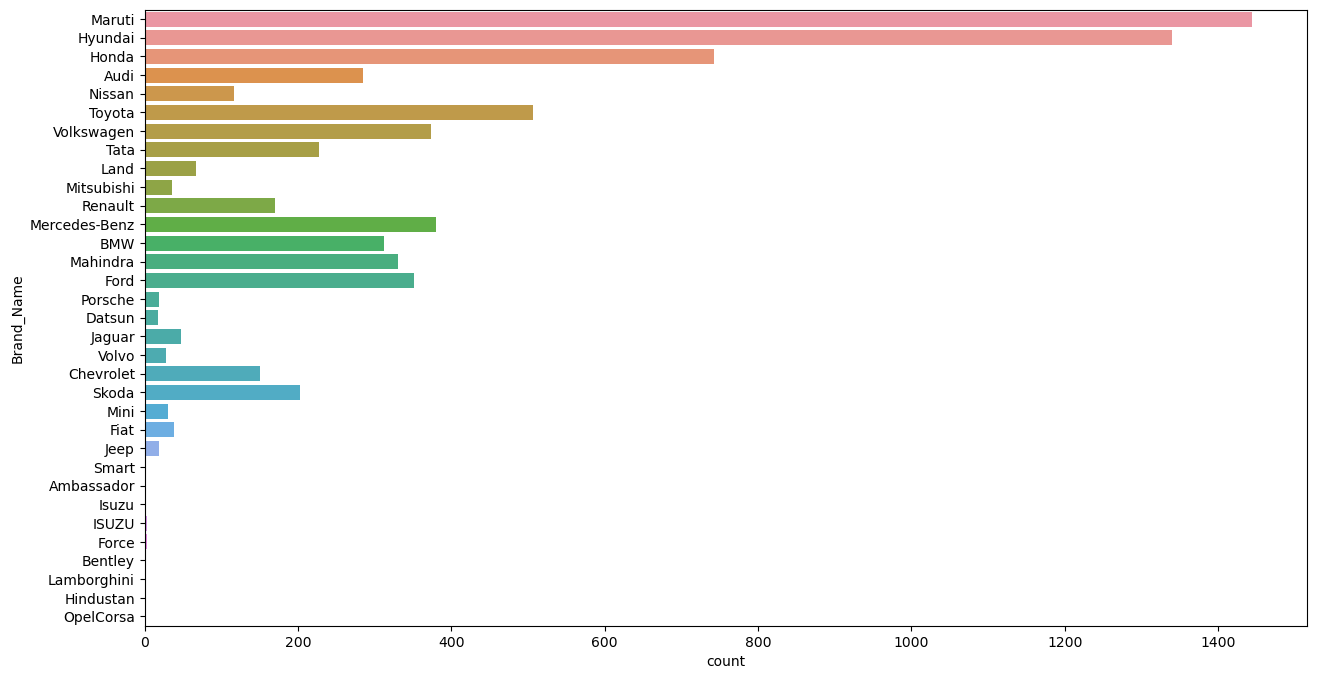

In [24]:
plt.figure(figsize = (15,8))
sns.countplot(y ="Brand_Name",data = cars, orient= 'h')
plt.show()

#plt.barh(cars["Brand_Name"],cars["Brand_Name"].value_counts())

<AxesSubplot:>

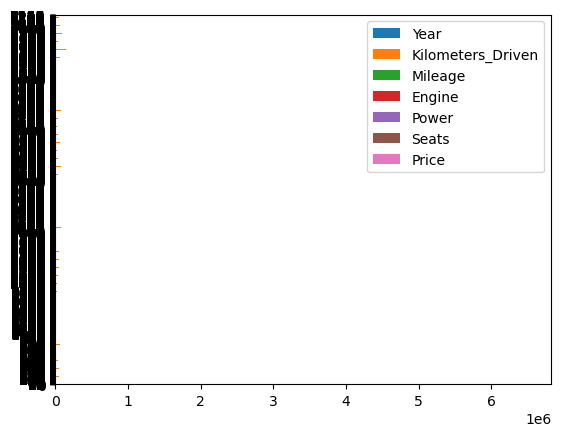

In [22]:
cars.plot.barh()


#plt.barh(cars["Brand_Name"],cars["Brand_Name"].values())

In [61]:
catagorical_columns =[]

for i in cars.columns:
    if cars[i].dtypes == "object":
        catagorical_columns.append(i)

catagorical_columns

processed_column = catagorical_columns.copy()
processed_column

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

In [62]:
#checking the values of catorical Columns
#for i in catagorical_columns:
 #   print(cars[i].value_counts())

In [63]:
(cars == 0).sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                1
Price                0
dtype: int64

In [64]:
zerosValues = {}

for i in cars.columns:
    if ((cars[i] == 0).sum()) == 0:
        continue
    else:
        zerosValues[i] = (cars[i] == 0).sum()

zerosValues

{'Seats': 1}

In [72]:
milageMode = cars["Mileage"].mode()[0]

cars.loc[cars["Mileage"] == 0, "Mileage"] = milageMode


In [27]:
seatZero = (cars['Seats'] == 0.0)

cars.loc[seatZero, 'Seats'] = 5.0

In [28]:
(cars == 0).sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              81
Engine                0
Power                 0
Seats                 0
Price                 0
Brand_Name            0
dtype: int64

In [29]:
cars.drop("Location", axis = 1, inplace = True)
cars.drop("Brand_Name",axis = 1, inplace = True)


cars.head()
# do the iqr and replace the zeros values

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [30]:
#del processed_column[0]
processed_column.remove("Brand_Name")
processed_column.remove("Location")

processed_column

['Fuel_Type', 'Transmission', 'Owner_Type']

In [31]:
encoder = LabelEncoder()

for i in processed_column:
    cars[i]= encoder.fit_transform(cars[i])

cars.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [32]:
def outlieriqr(df, column):
    global lower,upper
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]

    return  df1.shape[0]+ df2.shape[0]


In [33]:
countOutlier = {}
outlier={}

for i in cars.columns:
  if outlieriqr(cars,i) == 0:
    continue
  else:
    countOutlier[i] = outlieriqr(cars,i)
    outlier[i] ={'lower':lower,'upper':upper}

countOutlier

{'Year': 58,
 'Kilometers_Driven': 258,
 'Owner_Type': 1301,
 'Mileage': 99,
 'Engine': 65,
 'Power': 274,
 'Seats': 1205,
 'Price': 807}

In [34]:
outlier

{'Year': {'lower': 2003.5, 'upper': 2023.5},
 'Kilometers_Driven': {'lower': -24500.0, 'upper': 131500.0},
 'Owner_Type': {'lower': 0.0, 'upper': 0.0},
 'Mileage': {'lower': 6.274999999999997, 'upper': 29.995000000000005},
 'Engine': {'lower': 43.0, 'upper': 3123.0},
 'Power': {'lower': -14.545000000000002, 'upper': 229.575},
 'Seats': {'lower': 5.0, 'upper': 5.0},
 'Price': {'lower': -4.594202525336412, 'upper': 17.923670875560685}}

In [35]:
del countOutlier['Year']
del outlier['Year']


In [36]:
#calculating mean 

outlierMean = {}
outlierMode = {}

for i in countOutlier:
    if i == 'Owner_Type':
        outlierMode = cars[i].mode()
    elif i == 'Seats':
        outlierMode = cars[i].mode()
    else:
        outlierMean[i] = cars[i].mean()

In [37]:

        
for i in cars.index:
    if (cars.loc[i,'Kilometers_Driven']<outlier['Kilometers_Driven']['lower']) | (cars.loc[i,'Kilometers_Driven']>outlier['Kilometers_Driven']['upper']):
        cars.loc[i,'Kilometers_Driven'] = outlierMean['Kilometers_Driven']

for i in cars.index:
    if (cars.loc[i,'Mileage']<outlier['Mileage']['lower']) | (cars.loc[i,'Mileage']>outlier['Mileage']['upper']):
        cars.loc[i,'Mileage'] = outlierMean['Mileage']
        
for i in cars.index:
    if (cars.loc[i,'Engine']<outlier['Engine']['lower']) | (cars.loc[i,'Engine']>outlier['Engine']['upper']):
        cars.loc[i,'Engine'] = outlierMean['Engine']
        
for i in cars.index:
    if (cars.loc[i,'Power']<outlier['Power']['lower']) | (cars.loc[i,'Power']>outlier['Power']['upper']):
        cars.loc[i,'Power'] = outlierMean['Power']
        
for i in cars.index:
    if (cars.loc[i,'Price']<outlier['Price']['lower']) | (cars.loc[i,'Price']>outlier['Price']['upper']):
        cars.loc[i,'Price'] = outlierMean['Price']

In [38]:
countOutlier = {}
outlier={}

for i in cars.columns:
  if outlieriqr(cars,i) == 0:
    continue
  else:
    countOutlier[i] = outlieriqr(cars,i)
    outlier[i] ={'lower':lower,'upper':upper}

countOutlier

{'Year': 58,
 'Kilometers_Driven': 71,
 'Owner_Type': 1301,
 'Mileage': 1,
 'Power': 140,
 'Seats': 1205}

In [39]:
x = cars.drop("Price", axis=1)
y = cars.Price

print("Shape of x is :", x.shape)
print("Shape of y is :", y.shape)

Shape of x is : (7253, 9)
Shape of y is : (7253,)


In [40]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
scale = StandardScaler()

xTrain = scale.fit_transform(xTrain)
xTest = scale.transform(xTest)

In [43]:
lr = LinearRegression()

lr.fit(xTrain, yTrain)

yPred= lr.predict(xTest)

print("Accuracy on Traing set: ",lr.score(xTrain,yTrain))
print("Accuracy on Testing set: ",lr.score(xTest,yTest))

Accuracy on Traing set:  0.4781658031017505
Accuracy on Testing set:  0.5127980568814487


In [44]:
print('Mean Absolute Error (MAE) =', mean_absolute_error(yTest, yPred))

Mean Absolute Error (MAE) = 1.9783995420829876


In [45]:
print('Mean Squared Error (MSE) =', mean_squared_error(yTest, yPred))

Mean Squared Error (MSE) = 6.314967764709952


In [46]:
print('Root Mean Squared Error (RMSE) =', np.sqrt(mean_squared_error(yTest, yPred)))

Root Mean Squared Error (RMSE) = 2.512959960825073


In [47]:
print('R2 score = ', r2_score(yTest, yPred))

R2 score =  0.5127980568814487
